In [35]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
df_sampled = pd.read_csv('sampled_news.csv')

In [37]:
df_sampled.shape

(2000, 4)

In [38]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2000 non-null   int64 
 1   title       2000 non-null   object
 2   text        2000 non-null   object
 3   label       2000 non-null   object
dtypes: int64(1), object(3)
memory usage: 62.6+ KB


In [39]:
df_sampled['label'].value_counts(normalize=True) * 100

label
FAKE    51.15
REAL    48.85
Name: proportion, dtype: float64

In [40]:
df_sampled

,Unnamed: 0,title,text,label
0,9957,"American Dream, Revisited",Will Trump pull a Brexit times ten? What would...,FAKE
1,7596,Clintons Are Under Multiple FBI Investigations...,Clintons Are Under Multiple FBI Investigations...,FAKE
2,8905,The FBI Can’t Actually Investigate a Candidate...,Dispatches from Eric Zuesse This piece is cros...,FAKE
3,8752,Confirmed: Public overwhelmingly (10-to-1) say...,Print \n[Ed. – Every now and then the facade c...,FAKE
4,7804,Nanny In Jail After Force Feeding Baby To Death,Nanny In Jail After Force Feeding Baby To Deat...,FAKE
...,...,...,...,...
1995,7805,Saudis Foil ISIS Terror Attacks on Packed Stadium,Saudi Arabia says it has thwarted two ISIS ter...,FAKE
1996,10287,Police Department Is Being Evicted – Lafayette...,\nAn East Bay police department is now looking...,FAKE
1997,1176,"Trump, Sanders Crush the Competition in New Ha...",Democrat Bernie Sanders and Republican Donald ...,REAL
1998,5951,The words Extraordinary Claims needs to be ban...,The words Extraordinary Claims needs to be ban...,FAKE


In [41]:
if 'Unnamed: 0' in df_sampled.columns:
	df_sampled.drop(columns=['Unnamed: 0'], inplace=True)
if 'title' in df_sampled.columns:
	df_sampled.drop(columns=['title'], inplace=True)
df_sampled.head()

,text,label
0,Will Trump pull a Brexit times ten? What would...,FAKE
1,Clintons Are Under Multiple FBI Investigations...,FAKE
2,Dispatches from Eric Zuesse This piece is cros...,FAKE
3,Print \n[Ed. – Every now and then the facade c...,FAKE
4,Nanny In Jail After Force Feeding Baby To Deat...,FAKE


In [42]:
def clean_twitter_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Menghapus mention
    text = re.sub(r'#\w+', '', text)  # Menghapus hashtag
    text = re.sub(r'RT[\s]+', '', text)  # Menghapus retweet
    text = re.sub(r'https?://\S+', '', text)  # Menghapus URL
    text = re.sub(r'\bfr\b', '', text, flags=re.IGNORECASE)  # Menghapus kata "fr" (case-insensitive)
    
    text = re.sub(r'[^A-Za-z0-9 ]', '', text)  # Menghapus karakter non-alphanumeric
    text = re.sub(r'\s+', ' ', text).strip()  # Menghapus spasi berlebih

    return text

df_sampled['text'] = df_sampled['text'].apply(clean_twitter_text)

In [43]:
df_sampled.head()

,text,label
0,Will Trump pull a Brexit times ten What would ...,FAKE
1,Clintons Are Under Multiple FBI Investigations...,FAKE
2,Dispatches from Eric Zuesse This piece is cros...,FAKE
3,Print Ed Every now and then the facade cracks ...,FAKE
4,Nanny In Jail After Force Feeding Baby To Deat...,FAKE


In [44]:
# Fungsi normalisasi untuk menghapus "rt" dari teks
def normalisasi(str_text):
    if isinstance(str_text, str):  # Mengecek apakah input adalah string
        # Menghapus semua kemunculan "rt, fr" di dalam string
        str_text = str_text.replace('rt ', '')
        str_text = str_text.replace('fr ', '')
        return str_text
    return str_text

# Menerapkan fungsi normalisasi pada kolom 'full_text'
df_sampled['text'] = df_sampled['text'].apply(normalisasi)

# Menampilkan hasil
print(df_sampled)

                                                   text label
0     Will Trump pull a Brexit times ten What would ...  FAKE
1     Clintons Are Under Multiple FBI Investigations...  FAKE
2     Dispatches from Eric Zuesse This piece is cros...  FAKE
3     Print Ed Every now and then the facade cracks ...  FAKE
4     Nanny In Jail After Force Feeding Baby To Deat...  FAKE
...                                                 ...   ...
1995  Saudi Arabia says it has thwarted two ISIS ter...  FAKE
1996  An East Bay police department is now looking f...  FAKE
1997  Democrat Bernie Sanders and Republican Donald ...  REAL
1998  The words Extraordinary Claims needs to be ban...  FAKE
1999  Home World Britain No Longer a Sovereign Democ...  FAKE

[2000 rows x 2 columns]


In [45]:
# Mengecek duplikat baris di dataset
duplikat = df_sampled.duplicated(subset='text')
print(duplikat.sum())  # Menghitung jumlah duplikat

# Menampilkan jumlah baris yang duplikat
print(f"Jumlah baris duplikat: {duplikat.sum()}")

# Menampilkan baris-baris yang duplikat
duplikat_baris = df_sampled[df_sampled.duplicated(subset='text')]
print("Baris duplikat:")
print(duplikat_baris)

61
Jumlah baris duplikat: 61
Baris duplikat:
                                                   text label
187                                                      FAKE
188                                                      FAKE
240   Killing Obama administration rules dismantling...  REAL
243   A verdict in 2017 could have sweeping conseque...  REAL
253                                                      FAKE
...                                                 ...   ...
1780  The president refuses to say hed hold to the t...  REAL
1816  Nation Puts 2016 Election Into Perspective By ...  FAKE
1829  The move would make it easier for the Trump ad...  REAL
1877  Nation Puts 2016 Election Into Perspective By ...  FAKE
1936  Killing Obama administration rules dismantling...  REAL

[61 rows x 2 columns]


In [46]:
df_sampled['text'] = df_sampled['text'].astype(str)
df_sampled['label'] = df_sampled['label'].astype(str)
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   label   2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [47]:
df_sampled.drop_duplicates(subset="text", keep='first', inplace=True)  # Menghapus duplikat

# Mengecek duplikat baris di dataset
duplikat = df_sampled.duplicated(subset='text')
print(duplikat.sum())  # Menghitung jumlah duplikat

# Menampilkan jumlah baris yang duplikat
print(f"Jumlah baris duplikat: {duplikat.sum()}")

# Menampilkan baris-baris yang duplikat
duplikat_baris = df_sampled[df_sampled.duplicated(subset='text')]
print("Baris duplikat:")
print(duplikat_baris)

df_sampled.info()

0
Jumlah baris duplikat: 0
Baris duplikat:
Empty DataFrame
Columns: [text, label]
Index: []
<class 'pandas.core.frame.DataFrame'>
Index: 1939 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1939 non-null   object
 1   label   1939 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [48]:
# Mengecek jumlah nilai null di setiap kolom
null_counts = df_sampled.isnull().sum()
print(null_counts)

text     0
label    0
dtype: int64


In [49]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

df_sampled['case_folding'] = df_sampled['text'].apply(case_folding)

df_sampled.head()

,text,label,case_folding
0,Will Trump pull a Brexit times ten What would ...,FAKE,will trump pull a brexit times ten what would ...
1,Clintons Are Under Multiple FBI Investigations...,FAKE,clintons are under multiple fbi investigations...
2,Dispatches from Eric Zuesse This piece is cros...,FAKE,dispatches from eric zuesse this piece is cros...
3,Print Ed Every now and then the facade cracks ...,FAKE,print ed every now and then the facade cracks ...
4,Nanny In Jail After Force Feeding Baby To Deat...,FAKE,nanny in jail after force feeding baby to deat...


In [50]:
def tokenize(text):
    tokens = text.split()
    return tokens

df_sampled['tokenize'] = df_sampled['text'].apply(tokenize)
df_sampled.head()

,text,label,case_folding,tokenize
0,Will Trump pull a Brexit times ten What would ...,FAKE,will trump pull a brexit times ten what would ...,"[Will, Trump, pull, a, Brexit, times, ten, Wha..."
1,Clintons Are Under Multiple FBI Investigations...,FAKE,clintons are under multiple fbi investigations...,"[Clintons, Are, Under, Multiple, FBI, Investig..."
2,Dispatches from Eric Zuesse This piece is cros...,FAKE,dispatches from eric zuesse this piece is cros...,"[Dispatches, from, Eric, Zuesse, This, piece, ..."
3,Print Ed Every now and then the facade cracks ...,FAKE,print ed every now and then the facade cracks ...,"[Print, Ed, Every, now, and, then, the, facade..."
4,Nanny In Jail After Force Feeding Baby To Deat...,FAKE,nanny in jail after force feeding baby to deat...,"[Nanny, In, Jail, After, Force, Feeding, Baby,..."


In [51]:
from nltk.corpus import stopwords
import nltk

# Mengunduh stopwords
nltk.download('stopwords')

# Mengambil stopwords dari bahasa Inggris
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\YOGA
[nltk_data]     PRATAMA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df_sampled['stop_word'] = df_sampled['tokenize'].apply(lambda x: remove_stopwords(x))

df_sampled.head()

,text,label,case_folding,tokenize,stop_word
0,Will Trump pull a Brexit times ten What would ...,FAKE,will trump pull a brexit times ten what would ...,"[Will, Trump, pull, a, Brexit, times, ten, Wha...","[Will, Trump, pull, Brexit, times, ten, What, ..."
1,Clintons Are Under Multiple FBI Investigations...,FAKE,clintons are under multiple fbi investigations...,"[Clintons, Are, Under, Multiple, FBI, Investig...","[Clintons, Are, Under, Multiple, FBI, Investig..."
2,Dispatches from Eric Zuesse This piece is cros...,FAKE,dispatches from eric zuesse this piece is cros...,"[Dispatches, from, Eric, Zuesse, This, piece, ...","[Dispatches, Eric, Zuesse, This, piece, crossp..."
3,Print Ed Every now and then the facade cracks ...,FAKE,print ed every now and then the facade cracks ...,"[Print, Ed, Every, now, and, then, the, facade...","[Print, Ed, Every, facade, cracks, Somebody, a..."
4,Nanny In Jail After Force Feeding Baby To Deat...,FAKE,nanny in jail after force feeding baby to deat...,"[Nanny, In, Jail, After, Force, Feeding, Baby,...","[Nanny, In, Jail, After, Force, Feeding, Baby,..."


In [53]:
import nltk
from nltk.stem import PorterStemmer
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\YOGA
[nltk_data]     PRATAMA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
# Inisialisasi Porter Stemmer
stemmer = PorterStemmer()

def stemming(text):
    return [stemmer.stem(word) for word in text]

df_sampled['stemming'] = df_sampled['stop_word'].apply(lambda x: ' '.join(stemming(x)))
df_sampled.head()

,text,label,case_folding,tokenize,stop_word,stemming
0,Will Trump pull a Brexit times ten What would ...,FAKE,will trump pull a brexit times ten what would ...,"[Will, Trump, pull, a, Brexit, times, ten, Wha...","[Will, Trump, pull, Brexit, times, ten, What, ...",will trump pull brexit time ten what would tak...
1,Clintons Are Under Multiple FBI Investigations...,FAKE,clintons are under multiple fbi investigations...,"[Clintons, Are, Under, Multiple, FBI, Investig...","[Clintons, Are, Under, Multiple, FBI, Investig...",clinton are under multipl fbi investig agent a...
2,Dispatches from Eric Zuesse This piece is cros...,FAKE,dispatches from eric zuesse this piece is cros...,"[Dispatches, from, Eric, Zuesse, This, piece, ...","[Dispatches, Eric, Zuesse, This, piece, crossp...",dispatch eric zuess thi piec crosspost strateg...
3,Print Ed Every now and then the facade cracks ...,FAKE,print ed every now and then the facade cracks ...,"[Print, Ed, Every, now, and, then, the, facade...","[Print, Ed, Every, facade, cracks, Somebody, a...",print ed everi facad crack somebodi ask questi...
4,Nanny In Jail After Force Feeding Baby To Deat...,FAKE,nanny in jail after force feeding baby to deat...,"[Nanny, In, Jail, After, Force, Feeding, Baby,...","[Nanny, In, Jail, After, Force, Feeding, Baby,...",nanni in jail after forc feed babi to death 2 ...


In [55]:
df_sampled['label'].value_counts(normalize=True) * 100

label
FAKE    51.676122
REAL    48.323878
Name: proportion, dtype: float64

In [64]:
# 2. Label Encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_sampled['label'])

In [72]:
# 3. TF-IDF Vectorization dan SVD
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_sampled['stemming'])

svd = TruncatedSVD(n_components=100)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_lsa = lsa.fit_transform(X)

print(f"Shape of the original data: {X.shape}")
print(f"Shape of the data after SVD: {X_lsa.shape}")

Shape of the original data: (1939, 55655)
Shape of the data after SVD: (1939, 100)


In [66]:
# 4. Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_lsa, y, test_size=0.2, random_state=42)

In [67]:
# 5. Decision Tree dengan parameter optimal
DTmodel = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)
DTmodel.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)

In [68]:
# 6. Prediksi dan Evaluasi
y_pred = DTmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Akurasi: {accuracy:.6f}')
print('Confusion Matrix:')
print(conf_matrix)

Akurasi: 0.780928
Confusion Matrix:
[[161  40]
 [ 45 142]]


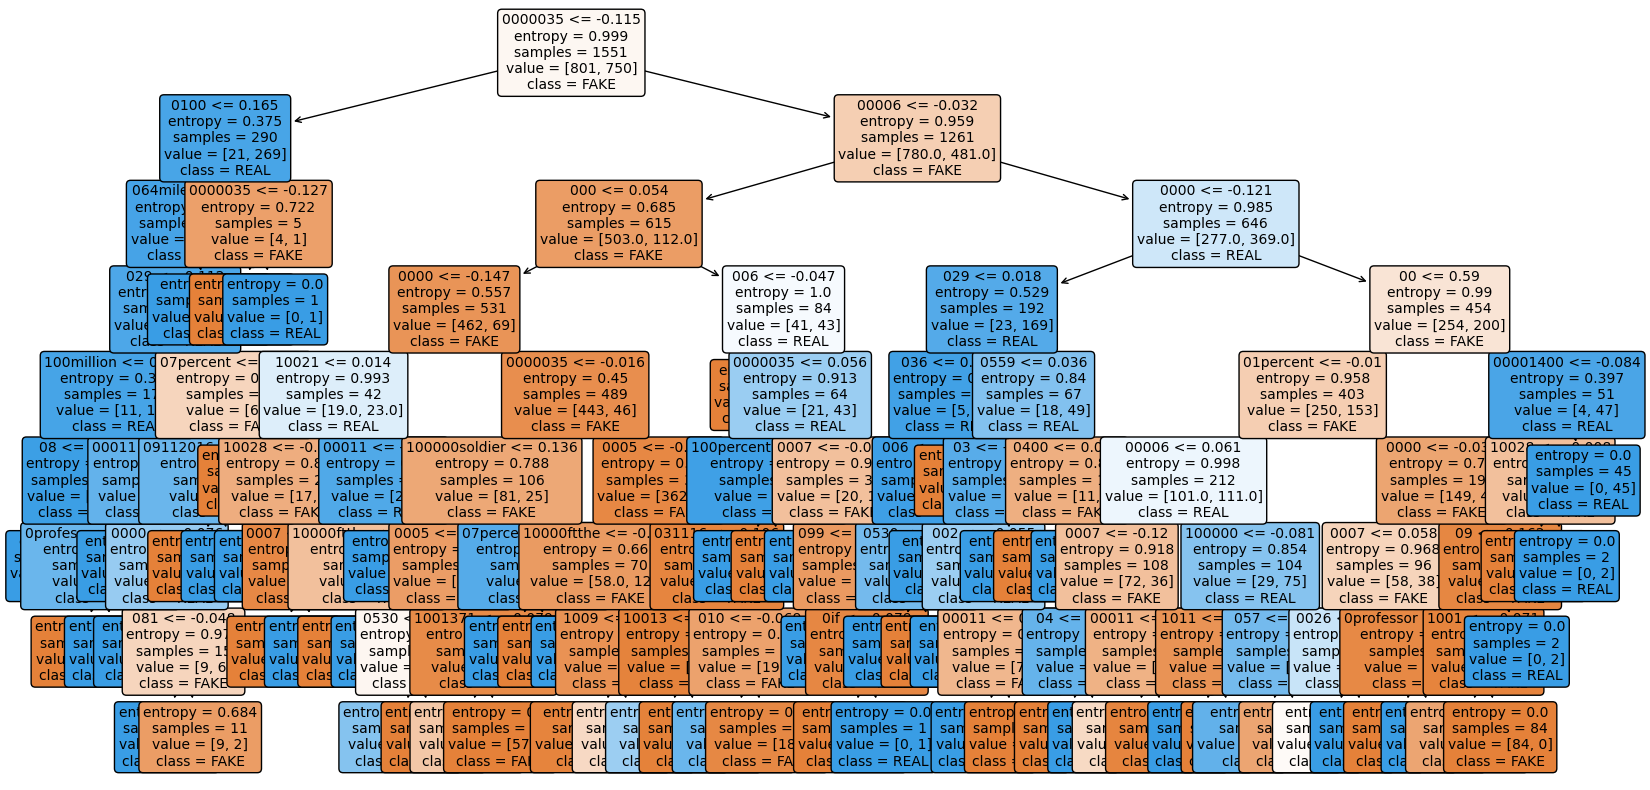

In [ ]:
# 7. Visualisasi Decision Tree
plt.figure(figsize=(20,10))
plot_tree(DTmodel, 
          feature_names=vectorizer.get_feature_names_out(),  # Menggunakan fitur dari TfidfVectorizer
          class_names=label_encoder.classes_,  # FAKE, REAL
          filled=True,
          rounded=True,
          fontsize=10)
plt.savefig('decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()
